*Name: Hari haran Suresh kumar*

*Date: 12.09.2025*

**DATA 512 A Human Centered Data Science Autumn 2025**

## Hospital Billing Variation: Understanding What Drives Differences in Inpatient Charges

## 1. Introduction

<div style="text-align: justify;">
Hospital pricing is often confusing, inconsistent, and difficult for patients to anticipate. There is a lack of transparency that makes it challenging to understand what actually goes into determining the final charges for a hospital stay.

This project focuses on examining the patterns behind hospital billing using a large real-world dataset. By looking at how charges vary across different medical, demographic, and administrative factors, the aim is to identify which variables tend to be linked with higher or lower costs. Rather than establishing cause-and-effect relationships, the goal is simply to map out the landscape of hospital pricing and highlight the factors most commonly associated with cost differences.


## Motivation

Healthcare costs have become one of the most widely discussed and debated issues around the world. While advances in medical care continue to improve life expectancy, they often come at a steep financial cost for individuals and families. Even within the same hospital, patients with similar conditions can end up facing vastly different bills. This variation raises an important question: what actually drives hospital billing amounts?

For this, I want to explore the factors that most influence the overall cost of hospitalization. Are costs primarily driven by medical factors, like the type of condition or medication prescribed, or by administrative ones, such as the type of insurance and hospital facility? Understanding these relationships could offer insights into how pricing works in healthcare, and perhaps why it sometimes feels unpredictable or unfair from a patient’s perspective.

A data-driven analysis could help separate perception from reality-revealing whether certain demographic or operational variables really make a difference in cost. It also contributes to discussions about equity and transparency in health systems, where financial strain can directly affect access to treatment
</div>

## 2. Background and related work

Healthcare costs have been studied extensively, especially in the United States, where medical bills can vary dramatically from one point to another. Researchers and journalists have repeatedly highlighted how charges depend on a mix of medical necessity, administration choices, and insurance agreements.

For example, reports by the Kaiser Family Foundation (KFF)<sup>[1]</sup> have shown that people with the same procedures often receive completely different bills depending on their insurance provider or the hospital they visited. News investigations from sources such as The New York Times<sup>[2]</sup> have also documented large price discrepancies between hospitals that are only a few miles apart. Academic studies in journals like Health Affairs show similar trends-hospital prices are shaped not only by clinical needs but by negotiated rates, hospital ownership, and local market competition.

Another relevant area of research at how patient demographics relate to healthcare costs. Several studies have found age-related patterns in spending, often due to chronic conditions, while others explore whether gender differences exist in how healthcare resources are used.

What these sources collectively suggest is that healthcare billing is influenced by multiple overlapping factors, not just medical ones. This background makes it reasonable to explore cost patterns in a structured dataset like the one used for this project. The dataset mirrors the elements that are frequently discussed in real-world research: patient characteristics, medical context, and hospital operations. Understanding how these variables relate to billing amounts in a simplified environment can make the broader issue more approachable and highlight the kinds of relationships that real healthcare datasets often reveal.


## 3.Research Question
<div style="text-align: justify;">
The central question I explore is:

How do medical factors (severity of illness, length of stay), administrative factors (admission type, insurance category), and hospital-level factors relate to total inpatient hospital charges, and which of these shows the strongest impact?

*At a practical level, I want to understand why two patients with similar medical needs can still receive very different hospital bills.*
<div>

## 4. Dataset and Licensing

For this study, I use the New York State SPARCS Hospital Inpatient Discharge dataset, which is publicly available from the New York State Department of Health: [LINK](https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/tg3i-cinn/about_data)


**4.1 Dataset structure**
<div style="text-align: justify;">
The SPARCS inpatient discharge file is a de-identified, visit-level dataset. Each row is one inpatient stay at a New York hospital. The columns describe:

- **Where the care happened**
  - *Health Service Area* – region in the state (e.g., Central NY, NYC, Long Island)
  - *Hospital County* – county where the hospital is located
  - *Facility Name* – name of the hospital (sometimes redacted)
  - *Permanent Facility ID* and *Operating Certificate Number* – internal facility IDs

- **Who the patient is**
  - *Age Group* – 0–17, 18–29, 30–49, 50–69, 70 or Older
  - *Gender* – M, F, or Unknown
  - *Race* – categories such as White, Black/African American, Multi-racial, Other
  - *Ethnicity* – Spanish/Hispanic Origin, Not of Spanish/Hispanic Origin, Multi-ethnic, Unknown
  - *Zip Code – 3 digits* – first three digits of the patient’s ZIP (or blank/OOS for privacy)

- **How and why the patient was admitted**
  - *Type of Admission* – Emergency, Elective, Urgent, Newborn, Trauma, or Not Available
  - *Emergency Department Indicator* – Y/N flag for ED involvement
  - *Patient Disposition* – where the patient went after discharge (home, died, transferred, etc.)
  - *Discharge Year* – year of discharge

- **Clinical information**
  - *CCSR Diagnosis Code / Description* – grouped diagnosis category (AHRQ system)
  - *CCSR Procedure Code / Description* – grouped procedure category
  - *APR DRG Code / Description* – All Patient Refined DRG
  - *APR MDC Code / Description* – Major Diagnostic Category
  - *APR Severity of Illness* – both a numeric code (0–4) and a description (Undetermined, Minor, Moderate, Major, Extreme)
  - *APR Risk of Mortality* – similar 0–4 scale and description
  - *APR Medical Surgical Description* – Medical, Surgical, or Not Applicable
  - *Birth Weight* – for newborns (in grams, rounded)

- **Payment and cost**
  - *Payment Typology 1–3* – primary/secondary/tertiary payer types (e.g., Medicare, Medicaid, Private Health Insurance, Self-Pay)
  - *Total Charges* – what the hospital charged for the stay (stored as text with commas)
  - *Total Costs* – estimated cost of providing the care (also stored as text)

- **Utilization**
  - *Length of Stay* – number of days the person stayed (1 to 120+, stored as text)

I don’t use every single field in this project. For my research question, the main focus is on how **hospital charges** relate to **severity, length of stay, admission type, and payer/insurance category**, with age group as a basic demographic variable.

**4.2 Variables used in this project**

For the analysis, I mainly focused on:

- **Total Charges** – outcome variable (what I try to explain)
- **Length of Stay** – number of days admitted
- **APR Severity of Illness Description** – Minor / Moderate / Major / Extreme
- **Type of Admission** – Emergency, Elective, Urgent, etc.
- **Payment Typology 1** – primary payer (Medicare, Medicaid, Private Insurance, Self-Pay, etc.)
- **Age Group** – broad age range (0–17, 18–29, 30–49, 50–69, 70+)

Because the dataset is extremely large, running full analyses inside a Jupyter notebook becomes slow and impractical. To keep the notebook reproducible and easy to grade, I take a random sample of 20,000 records using a fixed seed. This sample still reflects the overall structure of the data, and the sampling steps are documented so they can be repeated.

**License**

The dataset is released under the New York State Open Data terms, which allow reuse with appropriate attribution.
</div>

## 5. Methodology

My analysis follows a series of steps designed to explore patterns in hospital charges.

**5.1 Loading the dataset**

<div style="text-align: justify;">
To begin the analysis, I load the SPARCS inpatient discharge dataset from New York State. Before doing any cleaning or sampling, I first import the libraries that I will use throughout the project (pandas, numpy, matplotlib, and seaborn). Then I read the dataset into a DataFrame and take a quick look at the first few rows just to get a sense of the structure.

This step helps confirm that the file loaded correctly and allows me to see the raw formatting of important fields like `Total Charges`, `Length of Stay`, and the categorical variables.
</div>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    'data/HealthNYCdataset.csv',
    dtype={'Payment Typology 3': 'string'},
    low_memory=False)
df.head()


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,<NA>,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,<NA>,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,<NA>,NaN,N,"42,705.34","11,366.50"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,<NA>,NaN,Y,"72,700.17","12,111.75"
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,<NA>,NaN,Y,"55,562.51","8,339.72"


After loading the file, I check the dataset’s structure. This includes looking at the data types of each column, how many non-null entries there are, and whether important fields are stored as strings or numbers. This helps me identify what needs to be cleaned or converted before moving into the analysis.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135260 entries, 0 to 2135259
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

I also check the overall size of the dataset. The SPARCS file is large, so understanding how many rows and columns I’m dealing with is important before deciding on sampling and performance considerations.

In [37]:
df.shape

(2135260, 33)

**5.2 Sampling for analysis**

The full SPARCS dataset has over 2.1 million inpatient records. That is more data than I need for this project, and it also makes the notebook slower to run. To keep the analysis reproducible and manageable, I take a simple random sample of 20,000 rows using a fixed random seed.

This still gives me a large and diverse set of hospital stays, but keeps the runtime reasonable for statistics and plotting.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load full dataset once, with clean dtypes
df = pd.read_csv(
    'data/HealthNYCdataset.csv',
    dtype={'Payment Typology 3': 'string'},
    low_memory=False
)

# 2. Take a 20,000 row random sample for analysis
df = df.sample(n=20000, random_state=42)

df.shape

(20000, 33)

**5.3 Cleaning core numeric fields**

In this dataset, both `Total Charges` and `Length of Stay` are loaded as text (strings)

In this step, I:

- Check the data types for `Length of Stay` and `Total Charges`
- Remove commas from `Total Charges` and convert it to a numeric type
- Convert `Length of Stay` to numeric as well
- Drop any rows where either of these fields is missing

This gives me a cleaner subset of the data where both cost and stay length are usable for analysis.


In [39]:
# Check types first (just to see)
df.dtypes[['Length of Stay', 'Total Charges']]

# Clean "Total Charges" (remove commas, convert to float)
df['Total Charges'] = (
    df['Total Charges']
    .astype(str)
    .str.replace(',', '', regex=False)
)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Make sure Length of Stay is numeric too
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')

# Drop rows where these are missing
df = df.dropna(subset=['Length of Stay', 'Total Charges'])


**5.4 First look at length of stay vs. charges**

I start with a very simple question: on average, do longer hospital stays tend to cost more?

To get a rough sense of this, I:

- Group the data by `Length of Stay`
- Compute the average `Total Charges` for each length
- Plot a line chart with length of stay on the x-axis and mean charges on the y-axis

This plot helps confirm that the dataset behaves in a way that makes sense (longer stays generally costing more) and gives an early visual feel for how sharply charges rise as hospital days increase.


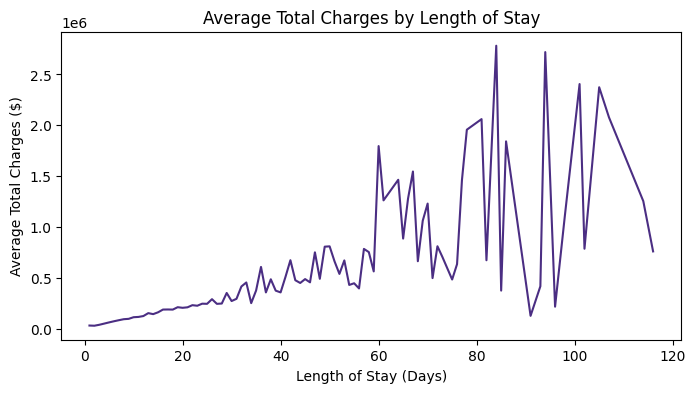

In [ ]:
plt.figure(figsize=(8,4))
avg_los = df.groupby("Length of Stay")["Total Charges"].mean().reset_index()

sns.lineplot(data=avg_los, x="Length of Stay", y="Total Charges", color="#4b2e83")
plt.title("Average Total Charges by Length of Stay")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Average Total Charges ($)")
plt.show()


The 120 day line plot shows the overall trend, but most patients do not stay that long.
Here I focus on stays of **30 days or less**, so I can see the pattern for more
“normal” hospitalizations without the very long stay outliers.

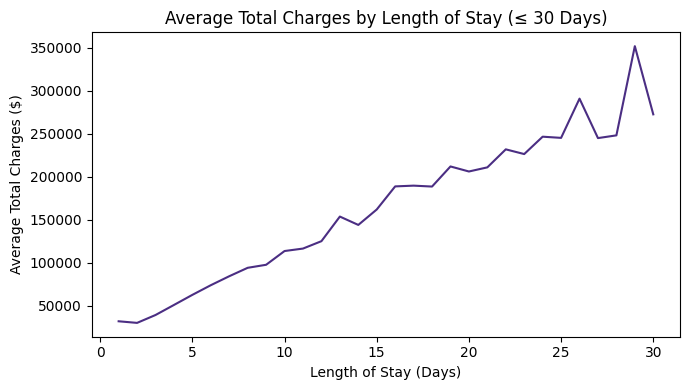

In [ ]:
# Focus on more typical stays (30 days or less)
short_los = avg_los[avg_los["Length of Stay"] <= 30]

plt.figure(figsize=(7,4))
sns.lineplot(data=short_los,
             x="Length of Stay",
             y="Total Charges",
             color="#4b2e83")
plt.title("Average Total Charges by Length of Stay (≤ 30 Days)")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Average Total Charges ($)")
plt.tight_layout()
plt.show()


**5.5 Regression: length of stay, age, severity, and admission type**

charges can also depend on age, severity of illness, and how the patient was admitted.

Here I fit a simple OLS regression with:

- **Outcome:** Total Charges  
- **Predictors:** Length of Stay, Age Group, APR Severity of Illness, Type of Admission  

This is mainly an exploratory check to see which factors are statistically linked to higher or lower charges, not a full predictive model.


In [42]:
import statsmodels.formula.api as smf

# Make sure the key variables are cleaned
df['Total Charges'] = (
    df['Total Charges']
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(float)
)
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')

# Drop rows with missing values in these fields
df_reg = df.dropna(subset=['Total Charges',
                           'Length of Stay',
                           'Age Group',
                           'APR Severity of Illness Description',
                           'Type of Admission'])

# OLS regression with categorical predictors
model = smf.ols(
    formula="Q('Total Charges') ~ Q('Length of Stay') "
            "+ C(Q('Age Group')) "
            "+ C(Q('APR Severity of Illness Description')) "
            "+ C(Q('Type of Admission'))",
    data=df_reg
).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('Total Charges')   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1525.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:19:37   Log-Likelihood:            -2.5661e+05
No. Observations:               19986   AIC:                         5.132e+05
Df Residuals:                   19972   BIC:                         5.134e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                8.666e+04   4321.014     20.055      0.000    7.82e+04    9.51e+04
C(Q('Age Group'))[T.18 to 29]                           -2.195e+04   3824.298     -5.740      0.000   -2.94e+04   -1.45e+04
C(Q('Age Group'))[T.30 to 49]                           -1.691e+04   3474.652     -4.867      0.000   -2.37e+04   -1.01e+04
C(Q('Age Group'))[T.50 to 69]                           -6834.6098   3403.753     -2.008      0.045   -1.35e+04    -162.973
C(Q('Age Group'))[T.70 or Older]                        -1.006e+04   3405.740     -2.954      0.003   -1.67e+04   -3386.160
C(Q('APR Severity of Illness Description'))[T.Major]    -3.315e+04   2414.060    -13.732      0.000   -3.79e+04   -2.84e+04
C(Q('APR Severity of Illness Description'))[T.Minor]    -4.312e+04   2579.983    -16.713      0.000   -4.82e+04   -3.81e+04
C(Q('APR Severity of Illness Description'))[T.Moderate]  -4.55e+04   2360.198    -19.279      0.000   -5.01e+04   -4.09e+04
C(Q('Type of Admission'))[T.Emergency]                  -3.576e+04   1847.725    -19.356      0.000   -3.94e+04   -3.21e+04
C(Q('Type of Admission'))[T.Newborn]                    -5.061e+04   4097.516    -12.352      0.000   -5.86e+04   -4.26e+04
C(Q('Type of Admission'))[T.Not Available]              -5.095e+04   2.36e+04     -2.158      0.031   -9.72e+04   -4681.919
C(Q('Type of Admission'))[T.Trauma]                      4147.2774   1.07e+04      0.389      0.697   -1.68e+04    2.51e+04
C(Q('Type of Admission'))[T.Urgent]                     -2.963e+04   2808.515    -10.551      0.000   -3.51e+04   -2.41e+04
Q('Length of Stay')                                      1.102e+04     92.971    118.479      0.000    1.08e+04    1.12e+04
==============================================================================
Omnibus:                    31093.751   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         57918869.275
Skew:                           9.403   Prob(JB):                         0.00
Kurtosis:                     266.054   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5.6 ANOVA: differences in charges across severity levels**

Because severity of illness is a core part of how hospitals think about care, I also test it on its own.

Here I run a one-way ANOVA with:

- **Outcome:** Total Charges  
- **Groups:** APR Severity of Illness (Minor, Moderate, Major, Extreme)

This checks whether the average charges are different across these severity groups, or if the differences could just be random noise.


In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols(
    "Q('Total Charges') ~ C(Q('APR Severity of Illness Description'))",
    data=df_reg
).fit()

anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Q('APR Severity of Illness Description')),4.354251e+13,3.0,1009.167373,0.0
Residual,2.873876e+14,19982.0,NaN,NaN


**5.7 Same diagnosis, different insurance: who is charged more?**

To focus on fairness, I now hold the medical problem constant and only change who is paying.

I pick the most common APR DRG Description (a diagnosis group) and filter the data to that diagnosis. Then I compare Total Charges across primary payer
categories (Payment Typology 1) using a boxplot.

This shows how charges differ for Medicaid, Medicare, private insurance, self-pay, etc., even when the diagnosis is the same.


In [44]:
df['APR DRG Description'].value_counts().head(10)

APR DRG Description
NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWBORN OR NEONATE WITH OTHER PROBLEM    1607
VAGINAL DELIVERY                                                                   1195
SEPTICEMIA AND DISSEMINATED INFECTIONS                                             1142
MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS                                      836
CESAREAN SECTION WITHOUT STERILIZATION                                              579
HEART FAILURE                                                                       557
SCHIZOPHRENIA                                                                       302
CVA AND PRECEREBRAL OCCLUSION WITH INFARCTION                                       265
KIDNEY AND URINARY TRACT INFECTIONS                                                 248
CARDIAC ARRHYTHMIA AND CONDUCTION DISORDERS                                         238
Name: count, dtype: int64

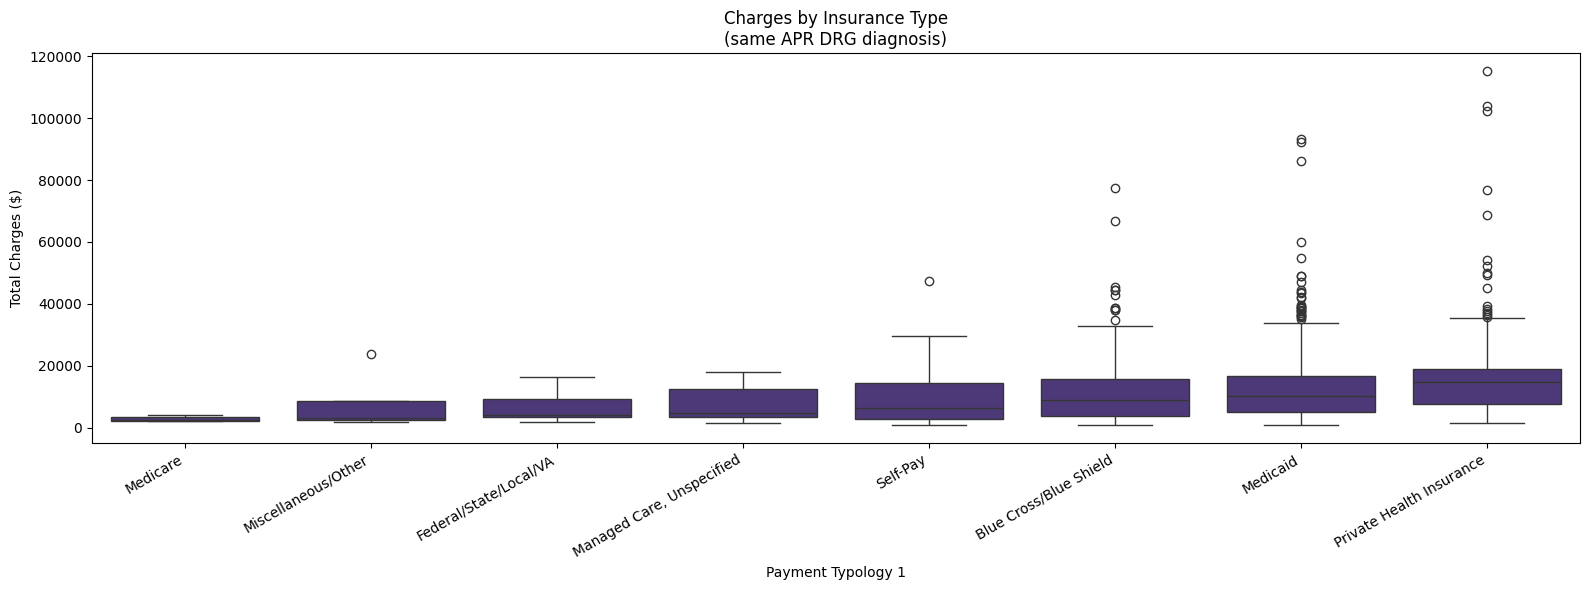

In [ ]:
# Pick the most common APR DRG diagnosis
target_diag = df['APR DRG Description'].value_counts().idxmax()
subset_diag = df[df['APR DRG Description'] == target_diag].copy()

# Order insurance types from lowest to highest median charge
payer_order = (
    subset_diag
    .groupby('Payment Typology 1')['Total Charges']
    .median()
    .sort_values()          # cheapest first
    .index
)

plt.figure(figsize=(16,6))
sns.boxplot(
    data=subset_diag,
    x='Payment Typology 1',
    y='Total Charges',
    color="#4b2e83",
    order=payer_order
)
plt.title("Charges by Insurance Type\n(same APR DRG diagnosis)")
plt.xticks(rotation=30, ha='right')
plt.ylabel("Total Charges ($)")
plt.tight_layout()
plt.show()


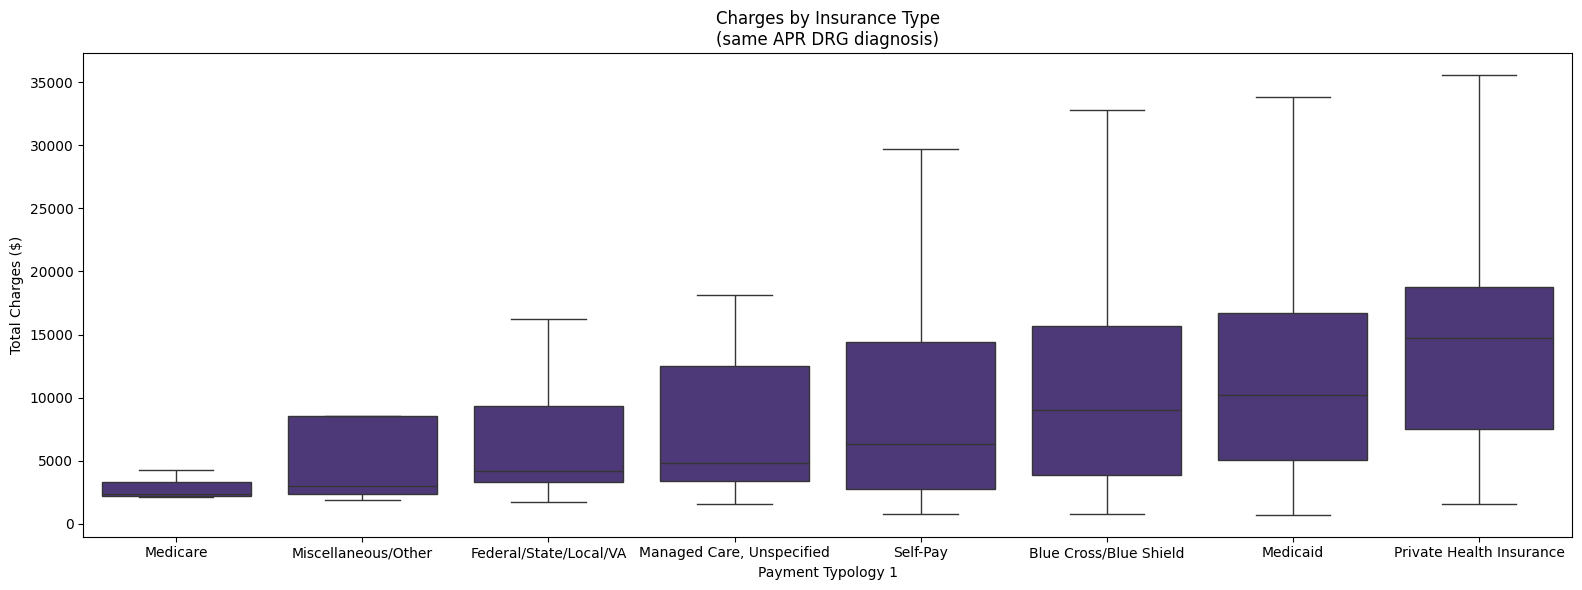

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(
    data=subset_diag,
    x='Payment Typology 1',
    y='Total Charges',
    color="#4b2e83",
    order=payer_order,
    showfliers=False       # hide outliers 
)
plt.title("Charges by Insurance Type\n(same APR DRG diagnosis)")
plt.ylabel("Total Charges ($)")
plt.tight_layout()
plt.show()
        


**5.8 Comparing admission type and severity together**

Here I build a pivot table of median total charges by **type of admission** (rows) and **severity of illness** (columns), and then plot it as a heatmap.
This helps me see how clinical severity and the way someone enters the hospital (emergency vs elective, etc.) interact in driving costs.


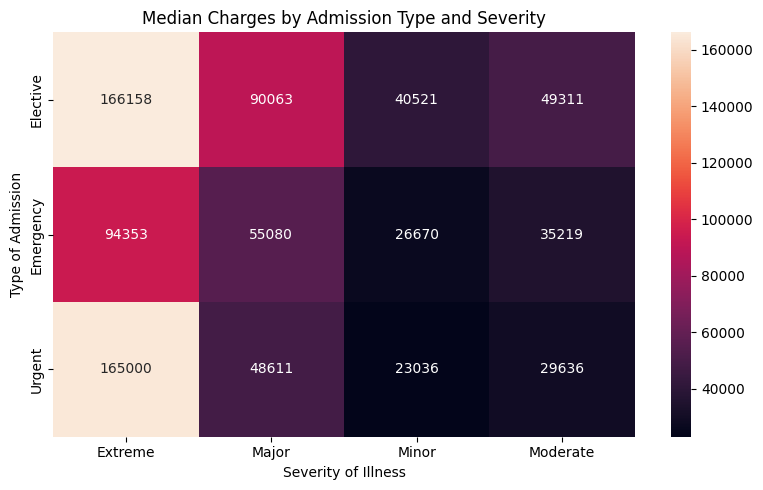

In [ ]:
# Make sure charges are numeric
df['Total Charges'] = (
    df['Total Charges']
    .astype(str)
    .str.replace(',', '', regex=False)
)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Keep only rows with needed fields
sub = df.dropna(subset=['Total Charges', 'Type of Admission', 'APR Severity of Illness Description'])

# Optional: focus on the main admission types to keep it clean
main_types = ['Elective', 'Emergency', 'Urgent']
sub = sub[sub['Type of Admission'].isin(main_types)]

# Pivot: median charges by admission type and severity
pivot = sub.pivot_table(
    values='Total Charges',
    index='Type of Admission',
    columns='APR Severity of Illness Description',
    aggfunc='median'
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("Median Charges by Admission Type and Severity")
plt.xlabel("Severity of Illness")
plt.ylabel("Type of Admission")
plt.tight_layout()
plt.show()


## 6. Findings

**1. Length of stay and total charges**

The line chart of average total charges by length of stay (1–120 days) shows a very steady upward trend. Short stays are much cheaper and long stays get expensive very quickly.

The regression model backs this up. When I regress total charges on:

- length of stay  
- age group  
- APR severity of illness  
- type of admission  

I get an R² of about **0.48**, which means this model explains a little under half of the variation in hospital charges.

In that model, each extra day in the hospital is associated with roughly \$10,000 more in billed charges, even after controlling for age, severity, and admission type. So the obvious intuition “longer stay means higher bill” is very clearly present in the data and it is not just noise.


**2. Severity of illness and charges**

Next, I looked at APR severity of illness.

- The ANOVA that compares mean charges across the four severity groups (Minor, Moderate, Major, Extreme) gives a huge F-statistic and a p-value basically equal to zero.
- In plain language: the average bill is not the same across severity levels. The differences are statistically real, not just random fluctuation.

In the regression output, all the severity categories have large, highly significant coefficients as well. Together, this tells me that clinical severity is a major driver of how high the charges go.



**3. Admission type and charges**


The regression also includes type of admission (elective, emergency, trauma, urgent, newborn, etc.).

- Emergency and urgent admissions tend to have higher charges than elective ones, even after controlling for length of stay and severity.
- Trauma cases are also noticeably more expensive.

This fits the idea that sudden, unplanned admissions (like an emergency or trauma) are costlier than planned, elective procedures.



**4. Insurance type and charges (for the same diagnosis)**


To focus on fairness, I picked one common APR DRG diagnosis (the newborn DRG that appears most often in the data) and looked only at patients with that diagnosis. That way, everyone in the comparison is there for essentially the same clinical reason.

The boxplot by Payment Typology 1 (primary payer) shows:

- **Medicaid and Medicare** tend to have **lower median charges** in this group.
- **Private/commercial insurance** (e.g., Private Health Insurance, Blue Cross/Blue Shield) and **Self-Pay** have **higher median charges and more extreme outliers.**

So even when the diagnosis is the same, and we are looking at a relatively standard newborn case, the billed amount depends a lot on who is paying. This suggests that payer contracts and pricing policies are influencing the bill, not only the medical need.


**5. Variation between hospitals (not plotted, but visible in the data)**

I also did some quick checks by hospital for the same newborn diagnosis and a fixed severity level. 

- Some hospitals have **much higher median charges** than others for the **same type of newborn stay**.
- The range between “cheaper” and “more expensive” hospitals can be tens of thousands of dollars.

**6. Admission type and severity together, the heatmap shows two things at the same time:**

- For each admission type, median charges rise as severity goes from Minor to Moderate to Major/Extreme.
- Within the same severity level, emergency and urgent admissions often sit in a higher price band than elective admissions.


This supports the idea that where you go (facility policies, contracts, and local pricing) matters in addition to what you are treated for. I started from the idea that both medical factors (how sick you are, how long you stay) and system factors (insurance, hospital, admission type) might shape hospital charges. The results mostly support that: clinical intensity explains most of the variation, but system level differences still create large gaps in what patients are charged for similar situations. The analysis suggests that medical intensity and time in the hospital drive most of the cost, but who pays and where you go can still change the bill by thousands of dollars at the edges.


## 7. Discussion and Interpretation

My main research question was: **what kinds of factors are most strongly associated with higher hospital charges?**

From the analysis, 

1. **Clinical factors matter a lot.**  
   Length of stay and severity of illness clearly drive charges upward. The regression and ANOVA both show strong, statistically significant effects. This is reassuring, because we expect sicker patients and longer stays to cost more.

2. **But clinical factors are not the whole story.**  
   Even after accounting for length of stay, age group, and severity, the model only explains about half of the variation in charges (R² ≈ 0.48). That means roughly half of the story is still tied up in other things.

3. **Administrative and financial factors also play a big role.**  
   In the newborn DRG slice, the same type of stay is billed very differently depending on insurance types, and, from my exploratory checks, also depending on which hospital the baby is born in. From a patient’s point of view, that feels less like “medical necessity” and more like how the system is set up around them.

4. **Equity and transparency questions.**  
   If two families have the same newborn diagnosis and similar length of stay, but get very different bills because of their insurance or the hospital they happened to go to, that raises fairness concerns. It also makes costs feel unpredictable, which is exactly what motivated this project in the first place.


## 8. Limitations

There are several important limitations to keep in mind:

- **Charges are not actual payments.**  
  The dataset contains *billed* charges, not what insurers or patients ultimately pay. Actual payments are often much lower, so this analysis is about pricing behavior, not true spending.

- **New York only, and one time period.**  
  All records are from hospitals in New York State, and for a specific discharge year. Patterns may look different in other states or years.

- **Limited clinical detail.**  
  I use APR DRG, severity level, and length of stay as proxies for how sick patients are, but they do not capture every clinical nuance or all comorbidities.

- **Modeling choices.**  
  I used a simple linear OLS model even though hospital charges are highly skewed and have big outliers. A more advanced model could capture more detail, but would also make the analysis more complex than needed for this project.

- **Descriptive, not causal.**  
  All of the results are associations. I am not claiming that “having private insurance causes the hospital to charge more” or that a specific hospital is intentionally overcharging. I am only describing the patterns that appear in this dataset.


## 9. Conclusion and Implications

This project started with a simple question: why do some patients end up with much higher hospital bills than others? Using New York inpatient data, I looked at how length of stay, severity of illness, admission type, insurance type, and hospital relate to total charges.

The results were pretty clear:

- Longer stays and higher severity are strongly linked to higher charges.
- Even after controlling for those clinical factors, a lot of variation is still unexplained.
- For a common newborn diagnosis, billed charges still change a lot depending on insurance types, and they also vary across hospitals.

From a **human-centered perspective**, 

Two patients with the same diagnosis and similar hospital stay can face very different bills just because they have different insurance or end up in different facilities.
For families, the bill shows up after the fact. They do not see the negotiation between hospitals and insurers; they just see a number that can be shocking and hard to make sense of. That unpredictability adds stress on top of an already stressful experience, especially for something like childbirth or an emergency visit.

### What could hospitals and payers do?

This project is purely descriptive, but it still points to a few directions that could make the system feel fairer and more understandable:

- **More transparent price ranges.**  
  Hospitals could publish realistic price ranges by diagnosis and severity, so patients have at least a rough idea of what to expect before they show up.

- **Clearer, patient-friendly billing explanations.**  
  Bills could explain, in normal language, which parts of the charge are driven by clinical need (e.g., length of stay, severity) and which parts are driven by contracts, insurance rules, or hospital policies.

- **Reducing extreme variation for similar cases.**  
  If newborn stays with the same diagnosis are billed very differently across payers or hospitals, that gap could be used as a starting point for internal review: are these differences really justified, or are they just artifacts of negotiations and historical pricing?

- **Designing for financial conversations.**  
  From a design perspective, hospitals and insurers could put more structure around cost conversations early in the process, instead of leaving patients to discover everything when the final bill arrives.



Medical need explains a big chunk of the bill, the rest is heavily shaped by **insurance categories and where you receive care**.

The main takeaway for me is that these cost patterns matter because they eventually show up as real bills for patients and families. When similar hospital stays lead to very different charges depending on insurance or facility, it raises questions about transparency and fairness, not just statistics. This analysis makes it easier to understand why a Human cenetered perspective is important in pricing practices to the people who depend on the healthcare system.

## 10.  References


1. Kaiser Family Foundation (KFF). *Health Care Costs: Overview and Key Trends.*  
   https://www.kff.org/

2. The New York Times. Reporting on hospital prices and medical billing.

3. Cooper, Z., et al. (2019). "The Price Ain’t Right? Hospital Prices and Health Spending on the Privately Insured." 

4. New York State Department of Health. *Hospital Inpatient Discharges (SPARCS De-Identified).*  
   https://health.data.ny.gov/

